In [14]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from params import *
import numpy as np

In [15]:
def draw_constraint(params: ProblemParams, sigmaP=None, sigmaS=None):
    phip = params.ptx_invert(sigmaP, side=Side.P)
    phis = params.ptx_invert(sigmaS, side=Side.S)
    N = 200
    PAD = [1, 5, 5, 1] # Top, Left, Bottom, Right
    pp1 = np.linspace(0.0, 2*params.PP, N)
    ps1 = phip(pp1)
    ps2 = np.linspace(0.0, 2*params.PS, N)
    pp2 = phis(ps2)
    # plt.figure(figsize=(5,4))
    plt.plot(pp1, ps1, "r", label="$p_S=\phi_p(p_P)$")
    plt.plot(pp2, ps2, "b", label="$p_P=\phi_s(p_S)$")
    plt.fill_between(pp1, ps1, where=(pp1 <= params.PP), color="#FF5500", edgecolor='black', lw=1.0, alpha=0.5)
    plt.fill_betweenx(ps2, pp2, where=(ps2 <= params.PS), color="#00FF00", edgecolor='black', lw=1.0, alpha=0.5)

    plt.xlim(0.0  - PAD[1], params.PP + PAD[3])
    plt.ylim(0.0  - PAD[2], params.PS + PAD[0])
    plt.xlabel("$p_P$")
    plt.ylabel("$p_S$")


    handles, labels = plt.gca().get_legend_handles_labels()
    G_patch = mpatches.Patch(color="#808080")
    handles.append(G_patch)
    labels.append("$G$")
    plt.legend(handles=handles, labels=labels)
    plt.show()

In [16]:
combinations = [
    [14.564623761196229,12.546583527823023,10.70408782712822,29.36623447859214]
]

/home/vu.xuan.bac@sun-asterisk.com/b/c/final-project/src/params.py:218: RuntimeWarning: divide by zero encountered in divide
  return lambda x: x * c * (U.s_(U.s_exp(-a / x) / b) - 1)


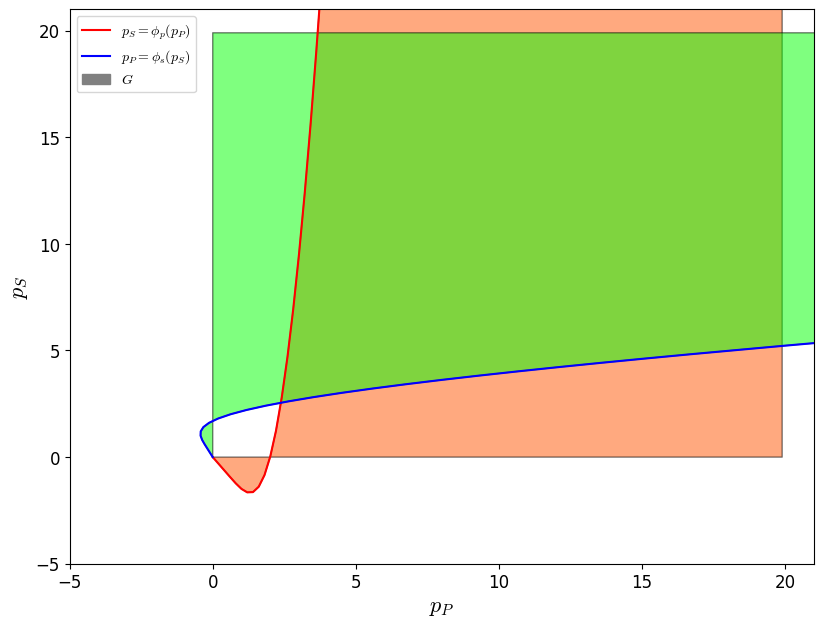

In [17]:
import os
import pandas as pd

file = "../simulation/generate/feasibility-005005.csv"
good = [27]
if os.path.exists(file):
    data = pd.read_csv(file)
    params = ProblemParams(rhoP=0.05, rhoS=0.05)
    for i in good:
        Dpp, Dps, Dsp, Dss = data.iloc[i][["Dpp", "Dps", "Dsp", "Dss"]]
        params.set_params(dynamic=True, Dpp=Dpp, Dps=Dps, Dsp=Dsp, Dss=Dss)
        draw_constraint(params=params, sigmaP=None, sigmaS=None)

    # start = 25
    # for i in range(start, start + 5):
    #     Dpp, Dps, Dsp, Dss = data.iloc[i][["Dpp", "Dps", "Dsp", "Dss"]]
    #     params.set_params(dynamic=True, Dpp=Dpp, Dps=Dps, Dsp=Dsp, Dss=Dss)
    #     draw_constraint(params=params, sigmaP=None, sigmaS=None)

In [18]:
params = ProblemParams(rhoP=0.05, rhoS=0.05)

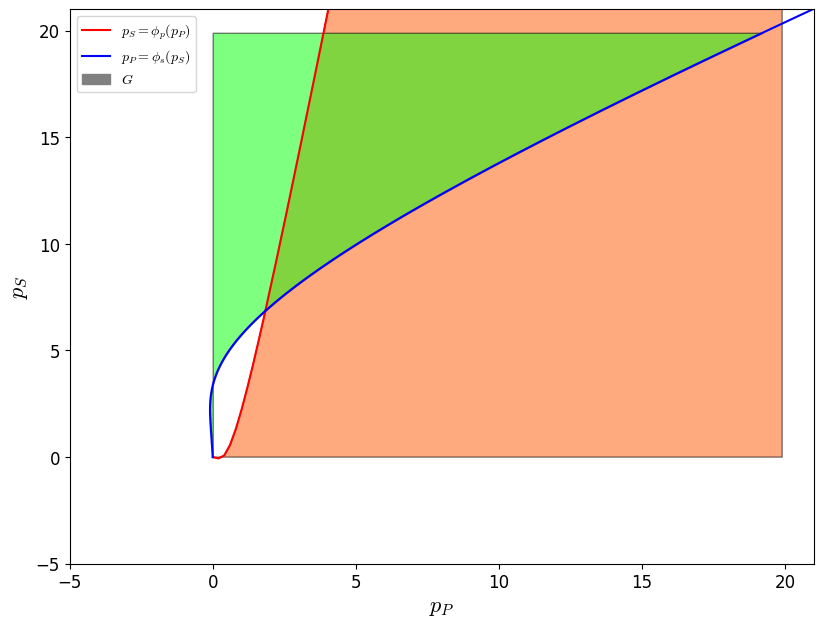

In [19]:
Dpp, Dps, Dsp, Dss = combinations[0]
params.set_params(dynamic=True, Dpp=Dpp, Dps=Dps, Dsp=Dsp, Dss=Dss)
draw_constraint(params=params, sigmaP=None, sigmaS=None)